In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../TileEM/

/home/jlee782/crowd-seg/analysis/TileEM


In [3]:
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj

In [4]:
import json

In [5]:
cat pixel_em/10workers_rand5/obj8/isoGT_EM_prj_iter0_thresh-1.json

[0.9651274441340782, 0.8591576657082912, 0.833289369559483]

In [10]:
def compute_PR(mode="basic"):
    tbl = []
    for test_sample in tqdm(test_sample_obj):
        if True:
        #try:
            sample_name= test_sample[0]
            objid = test_sample[1]
            outdir = '{}{}/obj{}/'.format(PIXEL_EM_DIR, sample_name, objid)
            for thresh in [-1,-2,0,2,1]:
                #if True:
                iteration=4
            #for iteration in range(5):
                if mode =='MV':
                    try:
                        [p,r,j] = json.loads(open(outdir+"MV_prj.json").read())
                    except(IOError):
                        gt_est_mask = pkl.load(open(outdir+"MV_mask.pkl"))
                        [p, r, j] = get_precision_recall_jaccard(gt_est_mask, get_gt_mask(objid))
                        with open(outdir+"MV_prj.json",'w') as fp:
                            fp.write(json.dumps([p, r, j]))
                    tbl.append([sample_name,objid,iteration,thresh,p,r,j])
                elif mode !="basic":
                    #gt_est_mask = pkl.load(open(outdir+"{}_gt_est_mask_{}_thresh{}.pkl".format(mode,iteration,thresh)))
                    #[p, r, j] = get_precision_recall_jaccard(gt_est_mask, get_gt_mask(objid))
                    #print "Before: ",[p, r, j]
                    #with open(outdir+"{}_EM_prj_iter{}_thresh{}.json".format(mode,iteration,thresh) as fp:
                    #    fp.write(json.dumps([p, r, j]))
                    [p,r,j] = json.loads(open(outdir+"{}_EM_prj_iter{}_thresh{}.json".format(mode,iteration,thresh)).read())
                    #print "After: ",[p, r, j]
                    tbl.append([sample_name,objid,iteration,thresh,p,r,j])
                else:
                    if thresh in [-2,0,2]:
                        #gt_est_mask = pkl.load(open(outdir+"gt_est_mask_{}_thresh{}.pkl".format(iteration,thresh)))
                        #[p, r, j] = get_precision_recall_jaccard(gt_est_mask, get_gt_mask(objid))
                        #with open(outdir+"EM_prj_thresh{}.json".format(thresh),'w') as fp:
                        #    fp.write(json.dumps([p, r, j]))
                        #print "Before: ",[p, r, j]
                        [p,r,j] = json.loads(open(outdir+"EM_prj_thresh{}.json".format(thresh)).read())
                        #print "After: ",[p, r, j]
                        tbl.append([sample_name,objid,4,thresh,p,r,j])
#         except(IOError):
#             #No file
#             print "Missing:",test_sample
#             pass
    df = pd.DataFrame(tbl,columns=["sample_name",'objid','iteration','thresh','P [{}]'.format(mode),'R [{}]'.format(mode),'J [{}]'.format(mode)])
    return df

In [491]:
ls pixel_em/10workers_rand0/obj1/EM_prj

ls: cannot access pixel_em/10workers_rand0/obj1/EM_prj: No such file or directory


In [492]:
compute_PR(mode="GT")

  0%|          | 0/35 [00:00<?, ?it/s]

Before:  [0.9119601945713118, 0.9542310979874116, 0.8737415062791277]
After:  [0.9119601945713118, 0.9542310979874116, 0.8737415062791277]
Before:  [0.881949868635944, 0.9651488072111275, 0.8547293809998968]
After:  [0.881949868635944, 0.9651488072111275, 0.8547293809998968]
Before:  [0.9205667344939332, 0.9491802004817779, 0.877325289089995]
After:  [0.9205667344939332, 0.9491802004817779, 0.877325289089995]
Before:  [0.9223156853043047, 0.9414872950501204, 0.8723136182007991]
After:  [0.9223156853043047, 0.9414872950501204, 0.8723136182007991]


  3%|▎         | 1/35 [00:18<10:27,  0.05it/s]

Before:  [0.9211955489726937, 0.9424197684357759, 0.8721101643116528]
After:  [0.9211955489726937, 0.9424197684357759, 0.8721101643116528]
Before:  [0.9804809564784204, 0.9233984474963747, 0.9067303262553922]
After:  [0.9804809564784204, 0.9233984474963747, 0.9067303262553922]
Before:  [0.9804809564784204, 0.9233984474963747, 0.9067303262553922]
After:  [0.9804809564784204, 0.9233984474963747, 0.9067303262553922]


KeyboardInterrupt: 

In [487]:
compute_PR(mode="basic")

  0%|          | 0/35 [00:00<?, ?it/s]

Before:  [0.9630909961176408, 0.7035900225347735, 0.6851165254237288]
After:  [0.9630909961176408, 0.7035900225347735, 0.6851165254237288]
Before:  [0.9633536027552063, 0.6955474395834952, 0.677618380710852]
After:  [0.9633536027552063, 0.6955474395834952, 0.677618380710852]


  3%|▎         | 1/35 [00:08<04:32,  0.12it/s]

Before:  [0.9732285195976033, 0.6878545341518377, 0.6750810295519543]
After:  [0.9732285195976033, 0.6878545341518377, 0.6750810295519543]
Before:  [0.9892459433662106, 0.6630555318604453, 0.6583103959347872]
After:  [0.9892459433662106, 0.6630555318604453, 0.6583103959347872]
Before:  [0.9892459433662106, 0.6630555318604453, 0.6583103959347872]
After:  [0.9892459433662106, 0.6630555318604453, 0.6583103959347872]


  6%|▌         | 2/35 [00:14<03:58,  0.14it/s]

Before:  [0.9994788952579469, 0.6544399897637123, 0.6542167647309627]
After:  [0.9994788952579469, 0.6544399897637123, 0.6542167647309627]
Before:  [0.9988735754041876, 0.642966817367568, 0.6425009589566552]
After:  [0.9988735754041876, 0.642966817367568, 0.6425009589566552]
Before:  [0.9988735754041876, 0.642966817367568, 0.6425009589566552]
After:  [0.9988735754041876, 0.642966817367568, 0.6425009589566552]


  9%|▊         | 3/35 [00:20<03:43,  0.14it/s]

Before:  [0.9988735754041876, 0.642966817367568, 0.6425009589566552]
After:  [0.9988735754041876, 0.642966817367568, 0.6425009589566552]
Before:  [0.9170024174053183, 0.6620678191489362, 0.6246373402336705]
After:  [0.9170024174053183, 0.6620678191489362, 0.6246373402336705]
Before:  [0.9170024174053183, 0.6620678191489362, 0.6246373402336705]
After:  [0.9170024174053183, 0.6620678191489362, 0.6246373402336705]


 11%|█▏        | 4/35 [00:31<04:06,  0.13it/s]

Before:  [0.9170024174053183, 0.6620678191489362, 0.6246373402336705]
After:  [0.9170024174053183, 0.6620678191489362, 0.6246373402336705]
Before:  [0.8861111111111111, 0.567741935483871, 0.5291312461123782]
After:  [0.8861111111111111, 0.567741935483871, 0.5291312461123782]
Before:  [0.8858638743455497, 0.5646273637374861, 0.5263376192451265]
After:  [0.8858638743455497, 0.5646273637374861, 0.5263376192451265]


 14%|█▍        | 5/35 [00:42<04:15,  0.12it/s]

Before:  [0.8869047619047619, 0.5635150166852058, 0.5257368202573682]
After:  [0.8869047619047619, 0.5635150166852058, 0.5257368202573682]
Before:  [0.7652759359379782, 0.9902323125659979, 0.7595423711653336]
After:  [0.7652759359379782, 0.9902323125659979, 0.7595423711653336]
Before:  [0.765486274109603, 0.9901003167898628, 0.7596718655053676]
After:  [0.765486274109603, 0.9901003167898628, 0.7596718655053676]


 17%|█▋        | 6/35 [00:52<04:12,  0.12it/s]

Before:  [0.7666428060128847, 0.989572333685322, 0.76049908703591]
After:  [0.7666428060128847, 0.989572333685322, 0.76049908703591]
Before:  [0.9128171763175016, 0.8681930693069307, 0.8017142857142857]
After:  [0.9128171763175016, 0.8681930693069307, 0.8017142857142857]
Before:  [0.9145860709592641, 0.8613861386138614, 0.7972508591065293]
After:  [0.9145860709592641, 0.8613861386138614, 0.7972508591065293]


 20%|██        | 7/35 [01:02<04:10,  0.11it/s]

Before:  [0.9157340355497038, 0.8607673267326733, 0.7975917431192661]
After:  [0.9157340355497038, 0.8607673267326733, 0.7975917431192661]
Before:  [0.9715324461517355, 0.9845672575599583, 0.9569594594594595]
After:  [0.9715324461517355, 0.9845672575599583, 0.9569594594594595]
Before:  [0.9715324461517355, 0.9845672575599583, 0.9569594594594595]
After:  [0.9715324461517355, 0.9845672575599583, 0.9569594594594595]


 23%|██▎       | 8/35 [01:16<04:18,  0.10it/s]

Before:  [0.9715324461517355, 0.9845672575599583, 0.9569594594594595]
After:  [0.9715324461517355, 0.9845672575599583, 0.9569594594594595]
Before:  [0.977602559707462, 0.9801787351054079, 0.958650829224563]
After:  [0.977602559707462, 0.9801787351054079, 0.958650829224563]
Before:  [0.977602559707462, 0.9801787351054079, 0.958650829224563]
After:  [0.977602559707462, 0.9801787351054079, 0.958650829224563]


 26%|██▌       | 9/35 [01:27<04:11,  0.10it/s]

Before:  [0.977602559707462, 0.9801787351054079, 0.958650829224563]
After:  [0.977602559707462, 0.9801787351054079, 0.958650829224563]
Before:  [0.9852687966328678, 0.9844078534174381, 0.9701291711517761]
After:  [0.9852687966328678, 0.9844078534174381, 0.9701291711517761]
Before:  [0.9855425645519017, 0.9828513694328391, 0.9688820695038898]
After:  [0.9855425645519017, 0.9828513694328391, 0.9688820695038898]


 29%|██▊       | 10/35 [01:37<04:04,  0.10it/s]

Before:  [0.9868092691622103, 0.9826056088036919, 0.9698668535388928]
After:  [0.9868092691622103, 0.9826056088036919, 0.9698668535388928]
Before:  [0.9599246906939215, 0.8814522104223265, 0.8501667460695569]
After:  [0.9599246906939215, 0.8814522104223265, 0.8501667460695569]
Before:  [0.9599246906939215, 0.8814522104223265, 0.8501667460695569]
After:  [0.9599246906939215, 0.8814522104223265, 0.8501667460695569]


 31%|███▏      | 11/35 [01:48<03:56,  0.10it/s]

Before:  [0.9599246906939215, 0.8814522104223265, 0.8501667460695569]
After:  [0.9599246906939215, 0.8814522104223265, 0.8501667460695569]
Before:  [0.94728704643185, 0.9869619934558268, 0.9355793090284406]
After:  [0.94728704643185, 0.9869619934558268, 0.9355793090284406]
Before:  [0.9479363236076838, 0.9862068965517241, 0.9355331646053197]
After:  [0.9479363236076838, 0.9862068965517241, 0.9355331646053197]


 34%|███▍      | 12/35 [01:58<03:47,  0.10it/s]

Before:  [0.9523553819868196, 0.9820790334759627, 0.9360875197927163]
After:  [0.9523553819868196, 0.9820790334759627, 0.9360875197927163]
Before:  [0.9736440419253078, 0.8314577449489463, 0.813155993710959]
After:  [0.9736440419253078, 0.8314577449489463, 0.813155993710959]
Before:  [0.973890137134888, 0.8192483163154465, 0.8016411215747965]
After:  [0.973890137134888, 0.8192483163154465, 0.8016411215747965]


 37%|███▋      | 13/35 [02:12<03:43,  0.10it/s]

Before:  [0.9807546874592536, 0.8170540951553334, 0.8041609647622305]
After:  [0.9807546874592536, 0.8170540951553334, 0.8041609647622305]
Before:  [0.7412280701754386, 0.9980314960629921, 0.7401459854014598]
After:  [0.7412280701754386, 0.9980314960629921, 0.7401459854014598]
Before:  [0.7412280701754386, 0.9980314960629921, 0.7401459854014598]
After:  [0.7412280701754386, 0.9980314960629921, 0.7401459854014598]


 40%|████      | 14/35 [02:22<03:34,  0.10it/s]

Before:  [0.7918622848200313, 0.9960629921259843, 0.7893915756630265]
After:  [0.7918622848200313, 0.9960629921259843, 0.7893915756630265]
Before:  [0.8491428571428571, 0.9195544554455446, 0.7904255319148936]
After:  [0.8491428571428571, 0.9195544554455446, 0.7904255319148936]
Before:  [0.8673408685306365, 0.9022277227722773, 0.7928221859706363]
After:  [0.8673408685306365, 0.9022277227722773, 0.7928221859706363]


 43%|████▎     | 15/35 [02:33<03:24,  0.10it/s]

Before:  [0.8731208659049909, 0.8985148514851485, 0.7947454844006568]
After:  [0.8731208659049909, 0.8985148514851485, 0.7947454844006568]
Before:  [0.9610722816951252, 0.9636299121795441, 0.9274310595065312]
After:  [0.9610722816951252, 0.9636299121795441, 0.9274310595065312]
Before:  [0.9629695408933487, 0.9619444690854253, 0.9276304533789563]
After:  [0.9629695408933487, 0.9619444690854253, 0.9276304533789563]


 46%|████▌     | 16/35 [02:43<03:14,  0.10it/s]

Before:  [0.9629695408933487, 0.9619444690854253, 0.9276304533789563]
After:  [0.9629695408933487, 0.9619444690854253, 0.9276304533789563]
Before:  [0.9147530670022019, 0.9673985362608117, 0.8873970094598719]
After:  [0.9147530670022019, 0.9673985362608117, 0.8873970094598719]
Before:  [0.9209939471169162, 0.9617431803060545, 0.8884449907805777]
After:  [0.9209939471169162, 0.9617431803060545, 0.8884449907805777]


 49%|████▊     | 17/35 [02:54<03:04,  0.10it/s]

Before:  [0.931943992184956, 0.9520958083832335, 0.8902021772939347]
After:  [0.931943992184956, 0.9520958083832335, 0.8902021772939347]
Before:  [0.9522015540381445, 0.9657313432835821, 0.9210796036897848]
After:  [0.9522015540381445, 0.9657313432835821, 0.9210796036897848]
Before:  [0.9524258680657902, 0.9645373134328358, 0.9202027681266731]
After:  [0.9524258680657902, 0.9645373134328358, 0.9202027681266731]


 51%|█████▏    | 18/35 [03:08<02:58,  0.10it/s]

Before:  [0.9528190610993159, 0.9645373134328358, 0.9205698005698005]
After:  [0.9528190610993159, 0.9645373134328358, 0.9205698005698005]
Before:  [0.9282138311412813, 0.9953292287161445, 0.924188233968853]
After:  [0.9282138311412813, 0.9953292287161445, 0.924188233968853]
Before:  [0.9299464179400675, 0.9948742834612235, 0.925512104283054]
After:  [0.9299464179400675, 0.9948742834612235, 0.925512104283054]


 54%|█████▍    | 19/35 [03:19<02:47,  0.10it/s]

Before:  [0.9325308747367822, 0.9939340632677202, 0.9272536924905211]
After:  [0.9325308747367822, 0.9939340632677202, 0.9272536924905211]
Before:  [0.9494507630990571, 0.9460480433940334, 0.900682405016599]
After:  [0.9494507630990571, 0.9460480433940334, 0.900682405016599]
Before:  [0.950682261208577, 0.944788841534289, 0.900646352723915]
After:  [0.950682261208577, 0.944788841534289, 0.900646352723915]


 57%|█████▋    | 20/35 [03:27<02:35,  0.10it/s]

Before:  [0.9542599136238712, 0.9416892677256877, 0.9010194624652456]
After:  [0.9542599136238712, 0.9416892677256877, 0.9010194624652456]
Before:  [0.9530683810637054, 0.9735522388059702, 0.9290149831937561]
After:  [0.9530683810637054, 0.9735522388059702, 0.9290149831937561]
Before:  [0.9539354158119908, 0.9717611940298507, 0.9282048357664233]
After:  [0.9539354158119908, 0.9717611940298507, 0.9282048357664233]


 60%|██████    | 21/35 [03:40<02:27,  0.10it/s]

Before:  [0.9552625382623028, 0.9688358208955223, 0.9267846944603084]
After:  [0.9552625382623028, 0.9688358208955223, 0.9267846944603084]
Before:  [0.900907411868626, 0.9324301861702128, 0.8456957636062113]
After:  [0.900907411868626, 0.9324301861702128, 0.8456957636062113]
Before:  [0.9075767472240366, 0.9238696808510638, 0.8444241871771498]
After:  [0.9075767472240366, 0.9238696808510638, 0.8444241871771498]


 63%|██████▎   | 22/35 [03:51<02:16,  0.10it/s]

Before:  [0.9119491665291303, 0.918467420212766, 0.8436521871898618]
After:  [0.9119491665291303, 0.918467420212766, 0.8436521871898618]


KeyboardInterrupt: 

In [480]:
modedf = compute_PR(mode="basic")

In [482]:
modedf.mean()

objid        21.657143
iteration     4.000000
thresh        0.000000
P [basic]     0.917940
R [basic]     0.909114
J [basic]     0.835612
dtype: float64

In [ ]:
ls pixel_em/5workers_rand8/obj14/MV_pr.json

In [11]:
df_all = compute_PR(mode="basic")
for mode in  ["GT","isoGT","GTLSA","isoGTLSA","MV"]:
    modedf = compute_PR(mode=mode)
    df_all = df_all.merge(modedf)

In [12]:
# df_all = compute_PR(mode="basic")
# for mode in  ["GT","isoGT","GTLSA","isoGTLSA","MV"]:
#     modedf = compute_PR(mode=mode)
#     df_all = df.merge(modedf)

In [16]:
df_all = df_all.drop_duplicates()

In [17]:
df = df_all[(df_all["iteration"]==4) ]

In [18]:
df.filter(regex="J").mean()

J [basic]       0.835612
J [GT]          0.847323
J [isoGT]       0.814255
J [GTLSA]       0.806127
J [isoGTLSA]    0.779330
J [MV]          0.836555
dtype: float64

In [20]:
df.filter(regex="J").std()

J [basic]       0.162563
J [GT]          0.149569
J [isoGT]       0.207604
J [GTLSA]       0.156791
J [isoGTLSA]    0.249207
J [MV]          0.162286
dtype: float64

if eliminate bad objects, then some of the J scores increases

In [21]:
df = df_all[(df_all["iteration"]==4) &(~df_all["objid"].isin([35,40,41]))]

In [22]:
df.mean()

objid           21.264706
iteration        4.000000
thresh           0.000000
P [basic]        0.940241
R [basic]        0.906633
J [basic]        0.855497
P [GT]           0.904151
R [GT]           0.959070
J [GT]           0.867550
P [isoGT]        0.907902
R [isoGT]        0.921818
J [isoGT]        0.838115
P [GTLSA]        0.878863
R [GTLSA]        0.932151
J [GTLSA]        0.824300
P [isoGTLSA]     0.886950
R [isoGTLSA]     0.899261
J [isoGTLSA]     0.802153
P [MV]           0.944215
R [MV]           0.903829
J [MV]           0.856451
dtype: float64

In [23]:
df.filter(regex="J").mean()

J [basic]       0.855497
J [GT]          0.867550
J [isoGT]       0.838115
J [GTLSA]       0.824300
J [isoGTLSA]    0.802153
J [MV]          0.856451
dtype: float64

In [24]:
df.filter(regex="J").std()

J [basic]       0.115047
J [GT]          0.092599
J [isoGT]       0.155745
J [GTLSA]       0.116575
J [isoGTLSA]    0.213394
J [MV]          0.114576
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x6e7b050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7378050>]], dtype=object)

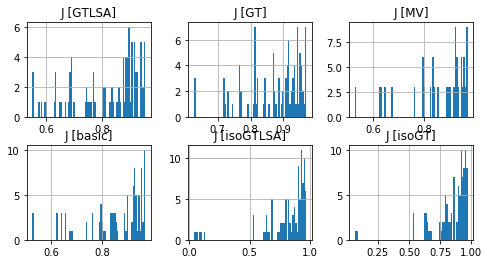

In [25]:
fig = plt.figure()
df.filter(regex="J").hist(bins=80,layout=(2,3),figsize=(8,4))

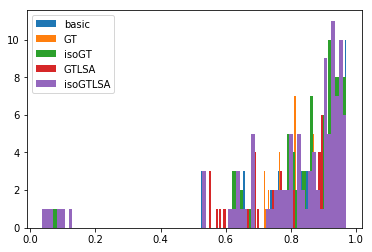

In [26]:
a = plt.hist(df["J [basic]"],label="basic",bins=80)
a = plt.hist(df["J [GT]"],label="GT",bins=80)
a = plt.hist(df["J [isoGT]"],label="isoGT",bins=80)
a = plt.hist(df["J [GTLSA]"],label="GTLSA",bins=80)
a = plt.hist(df["J [isoGTLSA]"],label="isoGTLSA",bins=80)
plt.legend()

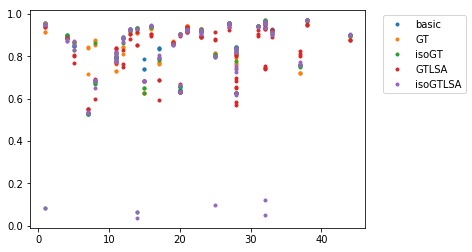

In [27]:
a = plt.plot(df["objid"],df["J [basic]"],'.',label="basic")
a = plt.plot(df["objid"],df["J [GT]"],'.',label="GT" )
a = plt.plot(df["objid"],df["J [isoGT]"],'.',label="isoGT" )
a = plt.plot(df["objid"],df["J [GTLSA]"],'.',label="GTLSA" )
a = plt.plot(df["objid"],df["J [isoGTLSA]"],'.',label="isoGTLSA" )
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [29]:
df[df["J [isoGTLSA]"]<0.3]

,sample_name,objid,iteration,thresh,P [basic],R [basic],J [basic],P [GT],R [GT],J [GT],...,J [isoGT],P [GTLSA],R [GTLSA],J [GTLSA],P [isoGTLSA],R [isoGTLSA],J [isoGTLSA],P [MV],R [MV],J [MV]
24,5workers_rand0,1,4,-2,0.977603,0.980179,0.958651,0.925597,0.990605,0.917542,...,0.085016,0.951557,0.989497,0.942043,0.085066,0.995264,0.085032,0.977603,0.980179,0.958651
33,5workers_rand8,14,4,-2,0.947287,0.986962,0.935579,0.917224,0.994563,0.912648,...,0.064762,0.857614,0.995117,0.854020,0.064817,0.997332,0.064806,0.947936,0.986207,0.935533
35,5workers_rand8,14,4,2,0.952355,0.982079,0.936088,0.947287,0.986962,0.935579,...,0.924010,0.939250,0.972867,0.915274,0.715415,0.036446,0.035925,0.947936,0.986207,0.935533
36,10workers_rand4,25,4,-2,0.973644,0.831458,0.813156,0.964084,0.839170,0.813731,...,0.809798,0.895606,0.975885,0.876214,0.096564,0.839539,0.094814,0.981550,0.817119,0.804759
87,5workers_rand6,32,4,-2,0.985490,0.982961,0.968938,0.969210,0.990224,0.960024,...,0.938949,0.929627,0.998471,0.928305,0.119054,0.992026,0.118941,0.985490,0.982961,0.968938
88,5workers_rand6,32,4,0,0.985490,0.982961,0.968938,0.980522,0.986975,0.967996,...,0.968938,0.930003,0.997351,0.927711,0.794275,0.048497,0.047895,0.985490,0.982961,0.968938


In [30]:
def plot_MV_EM_mask(object_id,Nworker,batch_num,mode,thresh,iteration):
    
    if iteration==0:    
        plt.figure()
        plt.title("MV mask")
        MV_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/MV_mask.pkl".format(Nworker,batch_num,object_id)))
        plt.imshow(MV_mask,cmap=mpl.cm.jet_r,interpolation=None)
        plt.colorbar()
        plt.figure()
        plt.title("Megamask")
        Mega_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/mega_mask.pkl".format(Nworker,batch_num,object_id)))
        plt.imshow(Mega_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
        plt.colorbar()
    
    EM_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}gt_est_mask_{}_thresh{}.pkl".format(Nworker,batch_num,object_id,mode,iteration,thresh)))
    plt.figure()
    plt.title("EM mask iter#{}".format(iteration))    
    plt.imshow(EM_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

    plt.figure()
    plt.title("pInT iter#{}".format(iteration))
    pInT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}p_in_mask_{}_thresh{}.pkl".format(Nworker,batch_num,object_id,mode,iteration,thresh)))
    plt.imshow(pInT_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()
    
    plt.figure()
    plt.title("pNotInT iter#{}".format(iteration))
    pnot_InT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}p_not_in_mask_{}_thresh{}.pkl".format(Nworker,batch_num,object_id,mode,iteration,thresh)))
    plt.imshow(pnot_InT_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

only the last mask was stored for GTLSA 

In [238]:
!cat pixel_em/5workers_rand0/obj1/isoGTLSA_EM_prj_iter0_thresh-2.json 

[0.9250473366439212, 0.9888863428047663, 0.9155293119298493]

In [239]:
!cat pixel_em/5workers_rand0/obj1/isoGTLSA_EM_prj_iter1_thresh-2.json

[0.921120766093279, 0.9918652612282309, 0.9142143058293438]

In [240]:
!cat pixel_em/5workers_rand0/obj1/isoGTLSA_EM_prj_iter2_thresh-2.json

[0.9179088661250442, 0.9924381301558204, 0.9115336046022169]

Something bad happened here. 

In [241]:
!cat pixel_em/5workers_rand0/obj1/isoGTLSA_EM_prj_iter3_thresh-2.json

[0.08506610086502367, 0.9952642835319279, 0.08503168294863513]

In [242]:
!cat pixel_em/5workers_rand0/obj1/isoGTLSA_EM_prj_iter4_thresh-2.json

[0.08506610086502367, 0.9952642835319279, 0.08503168294863513]

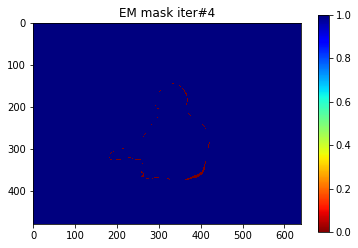

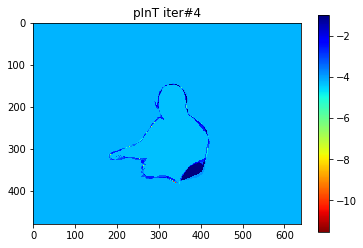

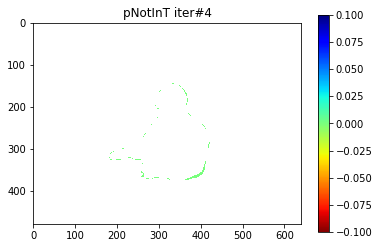

In [232]:
plot_MV_EM_mask(1,5,0,'isoGTLSA_',-2,4)

I reran this with storing outputs at every iteration 

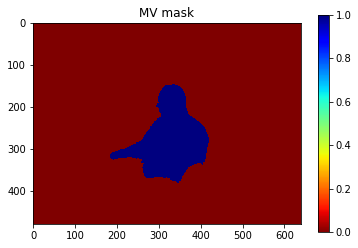

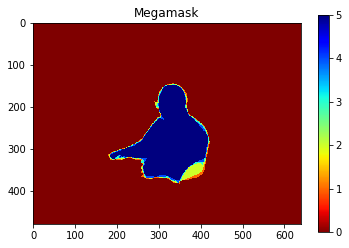

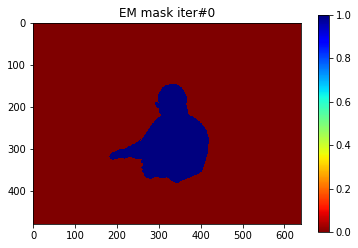

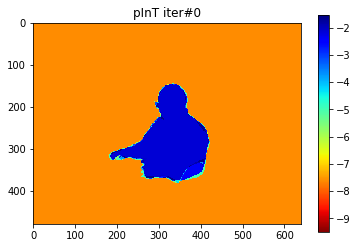

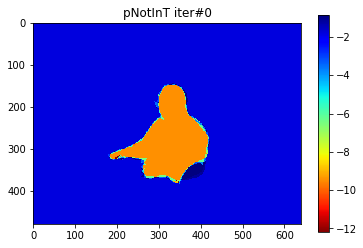

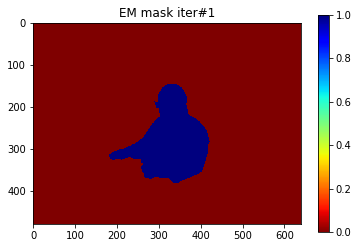

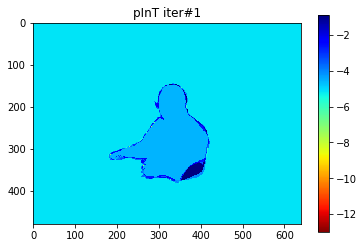

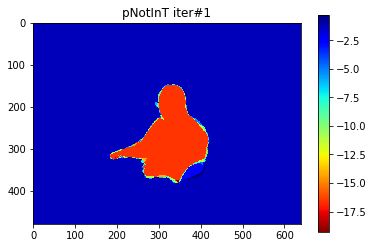

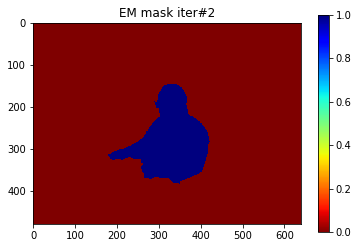

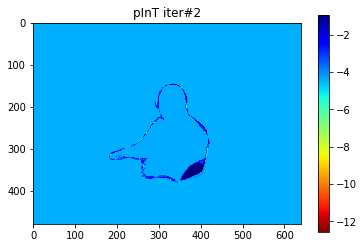

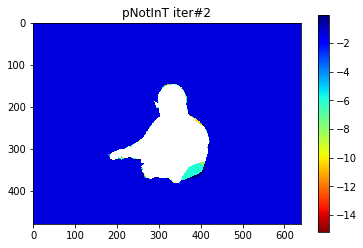

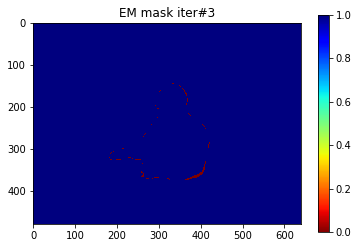

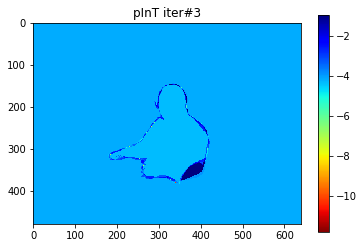

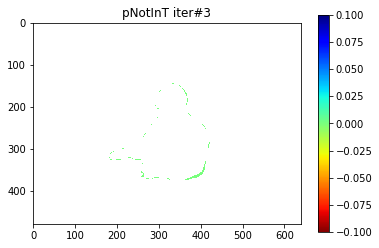

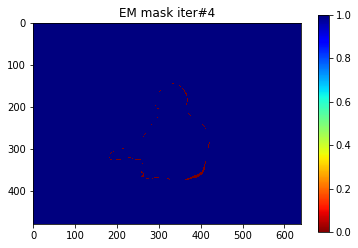

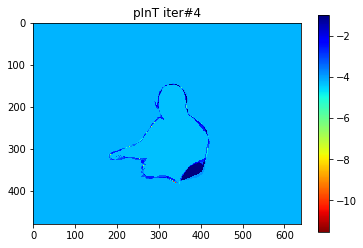

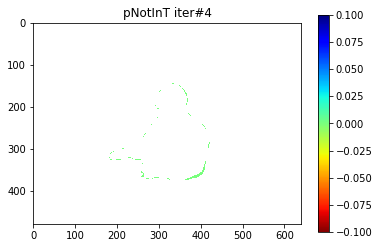

In [245]:
for iteration in range(5):
    plot_MV_EM_mask(1,5,0,'isoGTLSA_',-2,iteration)


#### If we only look at "good objects", ones with jaccard >0.6 then what would the average look like (i.e. filter out things that has gone terribly wrong, and how many are there)

In [33]:
Jkeys = df.keys()[df.keys().str.contains('J')]

In [34]:
len(df)

102

In [35]:
(df[Jkeys]>0.6).sum()

J [basic]        99
J [GT]          102
J [isoGT]        97
J [GTLSA]        95
J [isoGTLSA]     93
J [MV]           99
dtype: int64

In [37]:
df[(df[Jkeys]>0.5).sum(axis=1)==5].filter(regex='J').mean()

J [basic]       0.921780
J [GT]          0.919333
J [isoGT]       0.910424
J [GTLSA]       0.911876
J [isoGTLSA]    0.074394
J [MV]          0.919542
dtype: float64

#### Places where  GTLSA is doing badly is when everyone else also does badly 

- object 35 was supposed to be eliminated anyways 

In [38]:
df[df["J [isoGTLSA]"]<0.5]

,sample_name,objid,iteration,thresh,P [basic],R [basic],J [basic],P [GT],R [GT],J [GT],...,J [isoGT],P [GTLSA],R [GTLSA],J [GTLSA],P [isoGTLSA],R [isoGTLSA],J [isoGTLSA],P [MV],R [MV],J [MV]
24,5workers_rand0,1,4,-2,0.977603,0.980179,0.958651,0.925597,0.990605,0.917542,...,0.085016,0.951557,0.989497,0.942043,0.085066,0.995264,0.085032,0.977603,0.980179,0.958651
33,5workers_rand8,14,4,-2,0.947287,0.986962,0.935579,0.917224,0.994563,0.912648,...,0.064762,0.857614,0.995117,0.854020,0.064817,0.997332,0.064806,0.947936,0.986207,0.935533
35,5workers_rand8,14,4,2,0.952355,0.982079,0.936088,0.947287,0.986962,0.935579,...,0.924010,0.939250,0.972867,0.915274,0.715415,0.036446,0.035925,0.947936,0.986207,0.935533
36,10workers_rand4,25,4,-2,0.973644,0.831458,0.813156,0.964084,0.839170,0.813731,...,0.809798,0.895606,0.975885,0.876214,0.096564,0.839539,0.094814,0.981550,0.817119,0.804759
87,5workers_rand6,32,4,-2,0.985490,0.982961,0.968938,0.969210,0.990224,0.960024,...,0.938949,0.929627,0.998471,0.928305,0.119054,0.992026,0.118941,0.985490,0.982961,0.968938
88,5workers_rand6,32,4,0,0.985490,0.982961,0.968938,0.980522,0.986975,0.967996,...,0.968938,0.930003,0.997351,0.927711,0.794275,0.048497,0.047895,0.985490,0.982961,0.968938


In [42]:
df_dropped_bad_isoGTLSA = df.drop(df[df["J [isoGTLSA]"]<0.5].index)

df_dropped_bad_isoGTLSA.filter(regex='J').mean()

J [basic]       0.850826
J [GT]          0.864402
J [isoGT]       0.851003
J [GTLSA]       0.819115
J [isoGTLSA]    0.847627
J [MV]          0.851934
dtype: float64

#### Ranking Jaccard 

In [43]:


rank_df = df[df["thresh"]==0][Jkeys].rank(axis=1,ascending=False,method="average")

rank_df.mean()

J [basic]       2.750000
J [GT]          3.632353
J [isoGT]       3.455882
J [GTLSA]       4.411765
J [isoGTLSA]    3.882353
J [MV]          2.867647
dtype: float64

In [44]:
df[df["thresh"]==0][Jkeys].head()

,J [basic],J [GT],J [isoGT],J [GTLSA],J [isoGTLSA],J [MV]
1,0.677618,0.877325,0.681983,0.691184,0.687738,0.675043
4,0.658310,0.906054,0.906054,0.904175,0.903235,0.648100
7,0.642501,0.633076,0.633076,0.633076,0.633076,0.633076
10,0.624637,0.821642,0.624637,0.655347,0.624432,0.624637
13,0.526338,0.839683,0.530529,0.550199,0.534666,0.529607


In [45]:
df[df["thresh"]==0][Jkeys].rank(axis=1,ascending=False,method="average").head()

,J [basic],J [GT],J [isoGT],J [GTLSA],J [isoGTLSA],J [MV]
1,5,1.0,4.0,2,3,6
4,5,1.5,1.5,3,4,6
7,1,4.0,4.0,4,4,4
10,4,1.0,4.0,2,6,4
13,6,1.0,4.0,2,3,5


The basic model generally does better than the other models then GT, then ISOGT ..etc 

#### Count how many GTLSA > basic 

Larger J values corresponds to rank=1 and lower --> rank=2. So lower counts of rank is better.  

In [46]:
# df[['J [basic]','J [GTLSA]']].head()

# df[['J [basic]','J [GTLSA]']].rank(axis=1,ascending=False,method="average").head()

In [47]:
df[['J [basic]','J [GTLSA]']].rank(axis=1,ascending=False,method="average").sum()

J [basic]    130
J [GTLSA]    176
dtype: float64

In [48]:
df[['J [basic]','J [GT]']].rank(axis=1,ascending=False,method="average").sum()

J [basic]    136
J [GT]       170
dtype: float64

In [49]:
df[['J [GT]','J [GTLSA]']].rank(axis=1,ascending=False,method="average").sum()

J [GT]       125.5
J [GTLSA]    180.5
dtype: float64

#### x: sample (ordered by number of workers) v.s. y: Jaccard (for GTLSA/ basic )(do for PRJ and x as samples / obj aggregation)

In [50]:
df["Nworkers"]=df["sample_name"].apply(lambda x: int(x.split('w')[0]))

In [51]:
def plot_comparison(x_attr,y1_attr,y2_attr):
    if x_attr=="index":
        a = plt.plot(df.index,df[y1_attr],'.',label=y1_attr)
        a = plt.plot(df.index,df[y2_attr],'x',label=y2_attr )
    else:
        a = plt.plot(df[x_attr],df[y1_attr],'.',label=y1_attr)
        a = plt.plot(df[x_attr],df[y2_attr],'x',label=y2_attr )
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xlabel(x_attr)

In [52]:
def compare_PRJ_fixedNworkers(y1,y2):
    plt.figure()
    plot_comparison("Nworkers","P [{}]".format(y1),"P [{}]".format(y2))
    plt.figure()
    plot_comparison("Nworkers","R [{}]".format(y1),"R [{}]".format(y2))
    plt.figure()
    plot_comparison("Nworkers","J [{}]".format(y1),"J [{}]".format(y2))

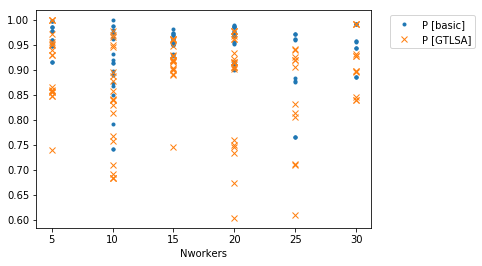

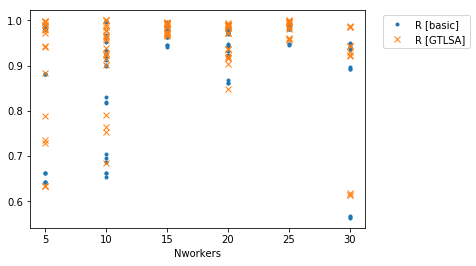

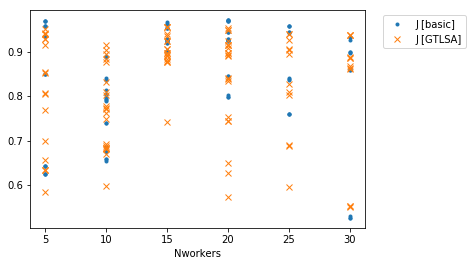

In [53]:
compare_PRJ_fixedNworkers('basic','GTLSA')

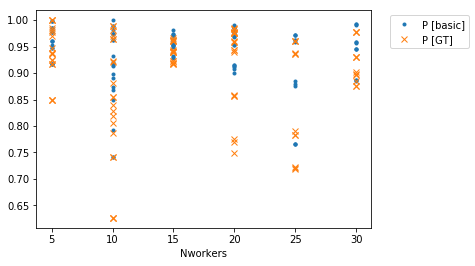

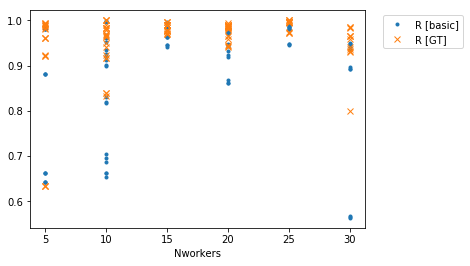

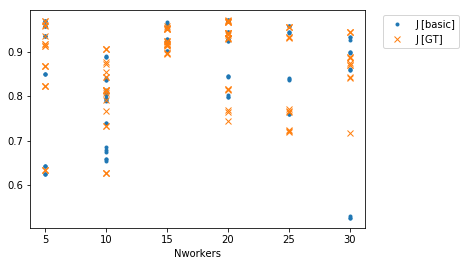

In [54]:
compare_PRJ_fixedNworkers('basic','GT')

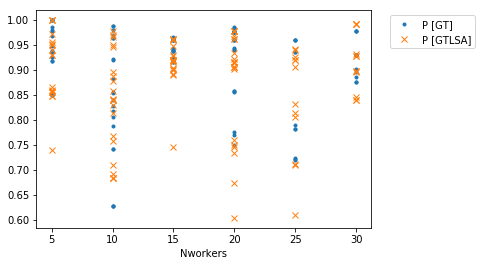

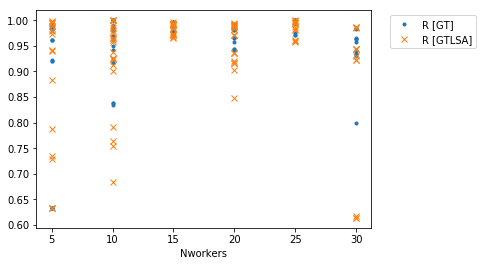

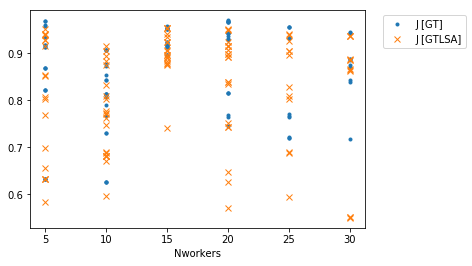

In [55]:
compare_PRJ_fixedNworkers('GT','GTLSA')

plotting every sample-object on the x axis 

In [56]:
def compare_PRJ_fixed_sample_object(y1,y2):
    plt.figure()
    plot_comparison("index","P [{}]".format(y1),"P [{}]".format(y2))
    plt.figure()
    plot_comparison("index","R [{}]".format(y1),"R [{}]".format(y2))
    plt.figure()
    plot_comparison("index","J [{}]".format(y1),"J [{}]".format(y2))

multiple does refers to different consecutive thresholds , plotting every sample,object, threshold pair

It looks like that the basic is consistently better than the variant models

In [60]:
df.head()

,sample_name,objid,iteration,thresh,P [basic],R [basic],J [basic],P [GT],R [GT],J [GT],...,P [GTLSA],R [GTLSA],J [GTLSA],P [isoGTLSA],R [isoGTLSA],J [isoGTLSA],P [MV],R [MV],J [MV],Nworkers
0,10workers_rand5,8,4,-2,0.963091,0.703590,0.685117,0.881950,0.965149,0.854729,...,0.708629,0.790621,0.596657,0.891918,0.746095,0.684233,0.973227,0.687816,0.675043,10
1,10workers_rand5,8,4,0,0.963354,0.695547,0.677618,0.920567,0.949180,0.877325,...,0.878090,0.764550,0.691184,0.923024,0.729583,0.687738,0.973227,0.687816,0.675043,10
2,10workers_rand5,8,4,2,0.973229,0.687855,0.675081,0.922316,0.941487,0.872314,...,0.887538,0.754293,0.688489,0.952069,0.672197,0.650194,0.973227,0.687816,0.675043,10
3,10workers_rand3,20,4,-2,0.989246,0.663056,0.658310,0.980481,0.923398,0.906730,...,0.965413,0.923825,0.894228,0.978668,0.921650,0.903500,0.999934,0.648128,0.648100,10
4,10workers_rand3,20,4,0,0.989246,0.663056,0.658310,0.988085,0.916062,0.906054,...,0.977255,0.923612,0.904175,0.986564,0.914484,0.903235,0.999934,0.648128,0.648100,10


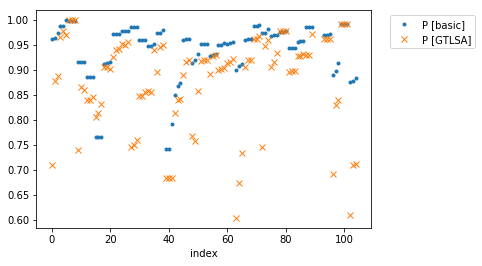

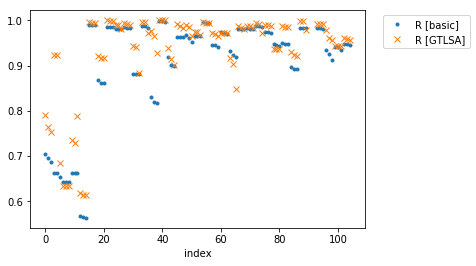

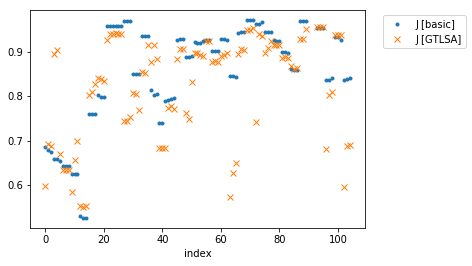

In [57]:
compare_PRJ_fixed_sample_object('basic','GTLSA')

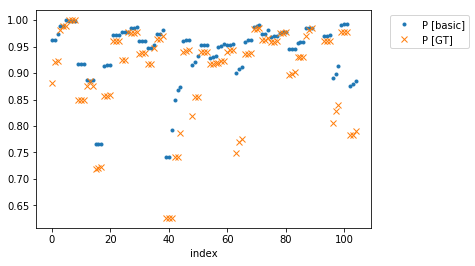

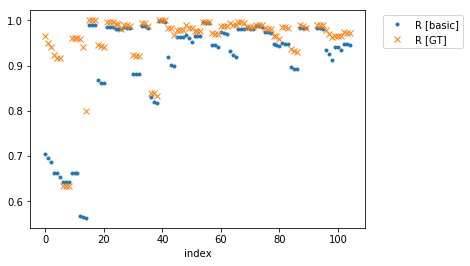

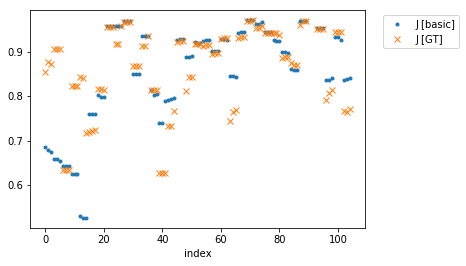

In [58]:
compare_PRJ_fixed_sample_object('basic','GT')

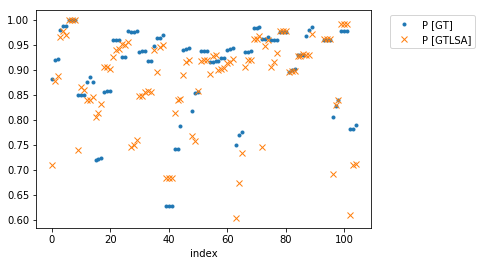

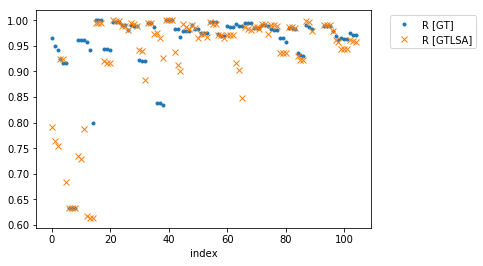

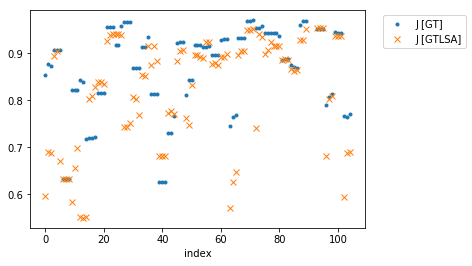

In [59]:
compare_PRJ_fixed_sample_object('GT','GTLSA')

#### Choosing the best Jaccard threshold for every sample object

In [380]:
# for sample in list(set(df["sample_name"])):
#     for objid in list(set(df["objid"])):
best_thresh_tbl = pd.DataFrame()
for test_sample in test_sample_obj:
    sample_name= test_sample[0]
    objid = test_sample[1]
    filtered_df=df[(df["sample_name"]==sample_name)&(df["objid"]==objid)]
    for attr in Jkeys:
        best_thresh_data = filtered_df[filtered_df[attr]==filtered_df[attr].max()]
        best_thresh_tbl =pd.concat([best_thresh_tbl,best_thresh_data])

In [382]:
# best_thresh_tbl

In [366]:
# df.groupby(['sample_name','objid',"thresh"])[Jkeys].apply(max)

------------------------------------------------------------------------------

In [30]:
def plot_Qj_evolution(object_id,Nworker,batch_num,mode=""):
    Qj0 =pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}Qj_0_thresh0.pkl".format(Nworker,batch_num,object_id,mode) ))
    Qj1 =pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}Qj_1_thresh0.pkl".format(Nworker,batch_num,object_id,mode) ))
    Qj2 =pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}Qj_2_thresh0.pkl".format(Nworker,batch_num,object_id,mode) ))
    Qj3 =pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}Qj_3_thresh0.pkl".format(Nworker,batch_num,object_id,mode) ))
    Qj4 =pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}Qj_4_thresh0.pkl".format(Nworker,batch_num,object_id,mode) ))

    Qjs = Qj0
    for wid in Qj0.keys():
        Qjs[wid]=[Qj0[wid],Qj1[wid],Qj2[wid],Qj3[wid],Qj4[wid]]
        plt.plot(range(5),Qjs[wid],label=wid)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    return Qjs 

In [ ]:
ls pixel_em/10workers_rand5/obj8/isoGT_

In [34]:
def Qj(object_id,Nworker,batch_num,mode=""):
    Qj4 =pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}_4_thresh0.pkl".format(Nworker,batch_num,object_id,mode) ))
    return Qj4

In [236]:
Qj(8,10,5,'isoGT_qp')

{54: 0.11193024474216001,
 148: 0.05093181648080233,
 156: 0.09550183369508271,
 161: 0.01725170271686251,
 169: 0.11417558565975601,
 193: 0.06395479380285907,
 208: 0.2065339420702043,
 234: 0.24317042137564554,
 235: 0.0,
 260: 0.007297357982186962}

In [35]:
Qj(8,10,5,'isoGT_qn')

{54: 0.04739235771666596,
 148: 0.013218854932630595,
 156: 0.22901347388107282,
 161: 0.2576614102945552,
 169: 0.06647681387342202,
 193: 0.015684107621031156,
 208: 0.020784630424618523,
 234: 0.3508734645301143,
 235: 0.43235431631742255,
 260: 0.3432226803247333}

In [37]:
ls pixel_em/10workers_rand5/obj8/isop

In [200]:
def plot_MV_EM_mask(object_id,Nworker,batch_num,mode,thresh,iteration):
    
    if iteration==0:    
        plt.figure()
        plt.title("MV mask")
        MV_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/MV_mask.pkl".format(Nworker,batch_num,object_id)))
        plt.imshow(MV_mask,cmap=mpl.cm.jet_r,interpolation=None)
        plt.colorbar()
        plt.figure()
        plt.title("Megamask")
        Mega_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/mega_mask.pkl".format(Nworker,batch_num,object_id)))
        plt.imshow(Mega_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
        plt.colorbar()
    
    EM_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}gt_est_mask_{}_thresh{}.pkl".format(Nworker,batch_num,object_id,mode,iteration,thresh)))
    plt.figure()
    plt.title("EM mask iter#{}".format(iteration))    
    plt.imshow(EM_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

    plt.figure()
    plt.title("pInT iter#{}".format(iteration))
    pInT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}p_in_mask_{}_thresh{}.pkl".format(Nworker,batch_num,object_id,mode,iteration,thresh)))
    plt.imshow(pInT_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()
    
    plt.figure()
    plt.title("pNotInT iter#{}".format(iteration))
    pnot_InT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}p_not_in_mask_{}_thresh{}.pkl".format(Nworker,batch_num,object_id,mode,iteration,thresh)))
    plt.imshow(pnot_InT_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

In [80]:
Nworker=10
batch_num=5
object_id=8
mode="isoGT_"
thresh=0
pInT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}p_in_mask_4_thresh{}.pkl".format(Nworker,batch_num,object_id,mode,thresh)))

In [86]:
pInT_mask[180,400]

-inf

In [88]:
log(0)

-inf

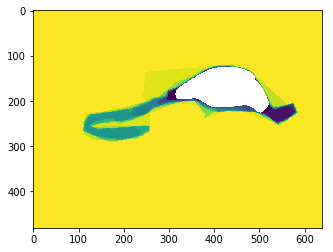

In [82]:
plt.imshow(pInT_mask)

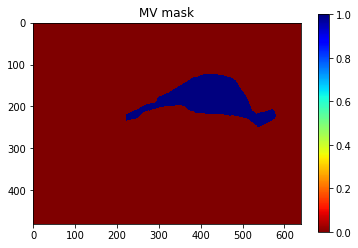

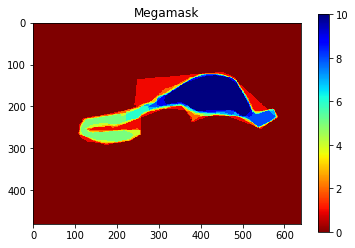

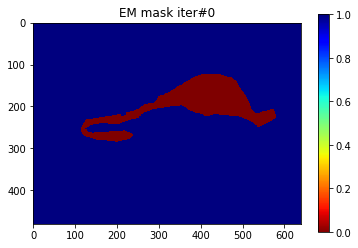

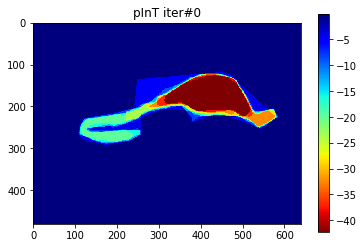

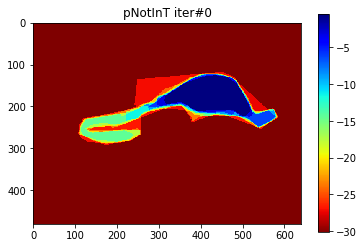

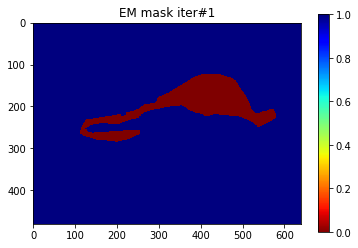

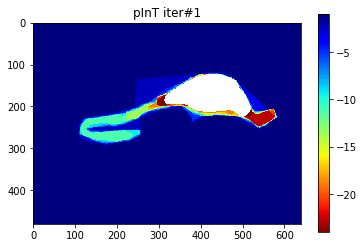

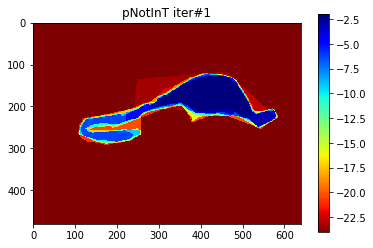

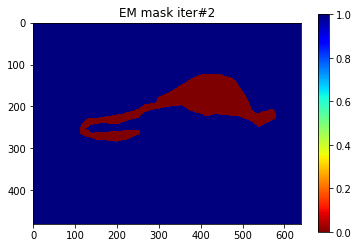

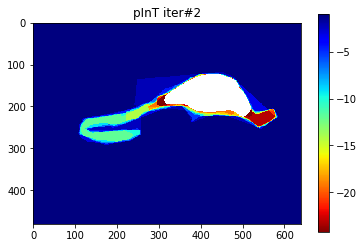

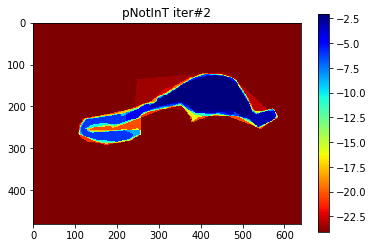

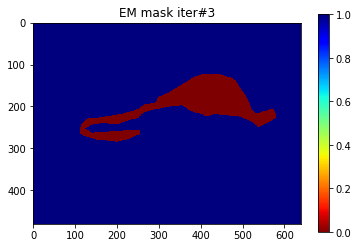

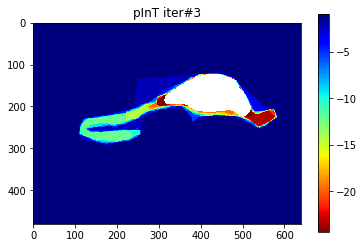

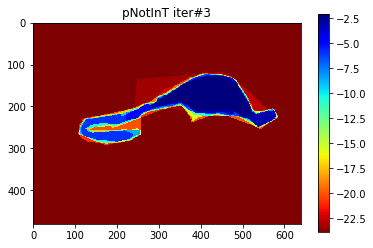

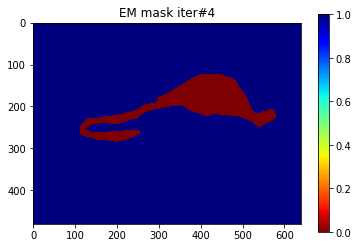

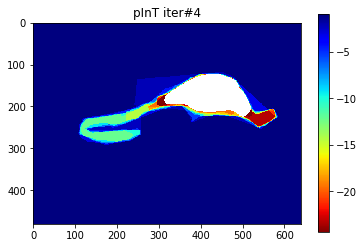

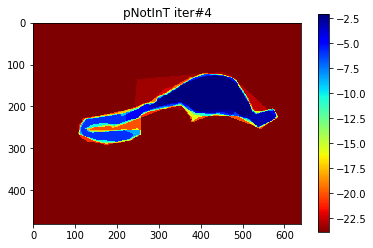

In [101]:
for iteration in range(5):
    plot_MV_EM_mask(8,10,5,'isoGT_',0,iteration)

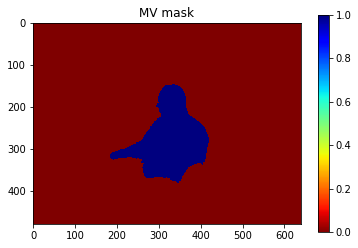

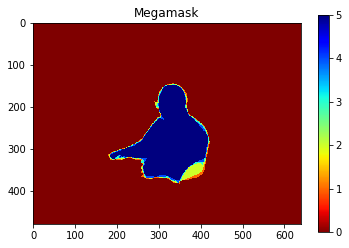

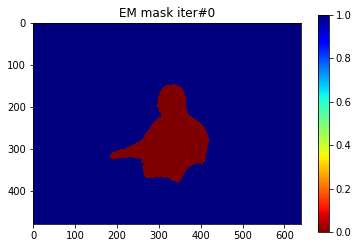

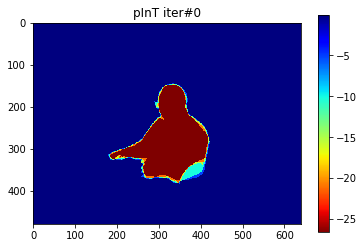

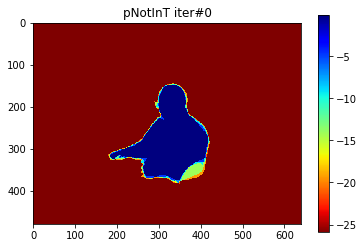

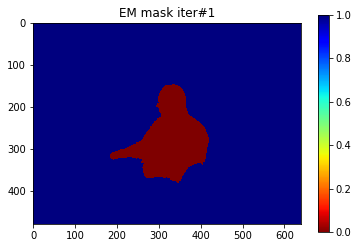

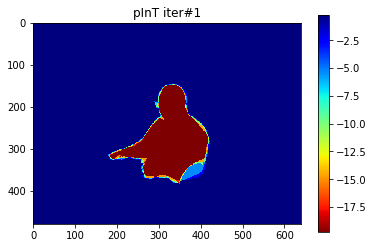

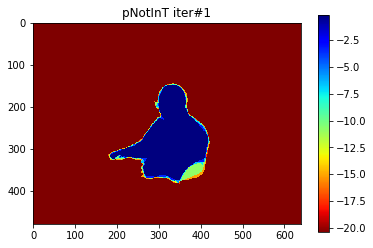

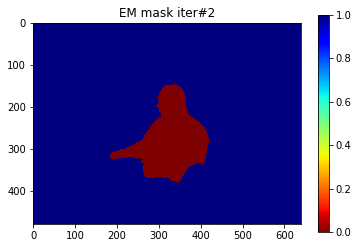

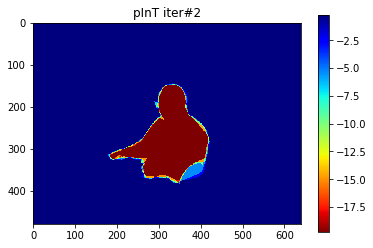

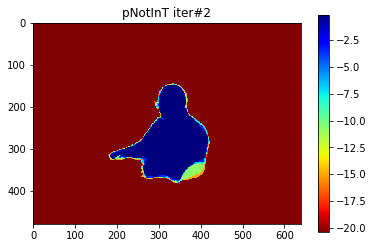

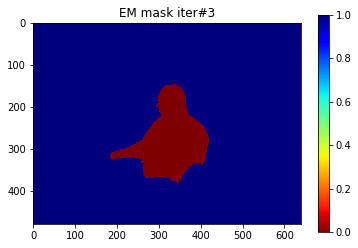

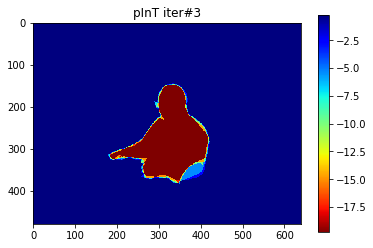

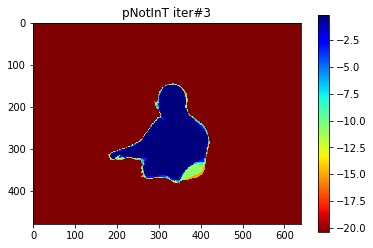

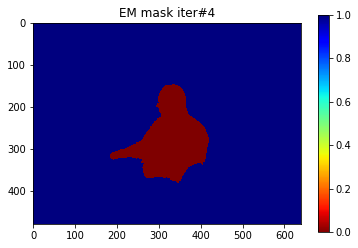

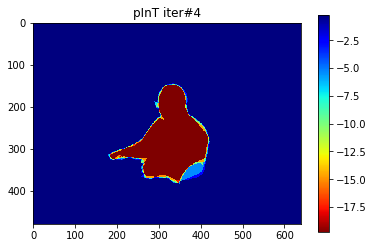

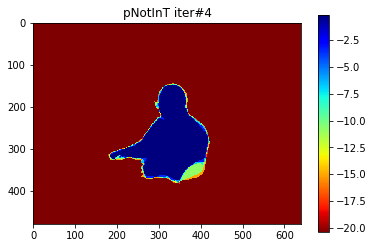

In [102]:
for iteration in range(5):
    plot_MV_EM_mask(1,5,0,'isoGT_',0,iteration)

# Ground truth worker qualities 

###### For the harder object (bag) 

GT PixelEM with iso exclusion

In [256]:
pInT = pkl.load(open("pixel_em/10workers_rand5/obj8/isoGT_p_in_mask_0_thresh-2.pkl"))
pNotInT = pkl.load(open("pixel_em/10workers_rand5/obj8/isoGT_p_in_mask_0_thresh-2.pkl"))
qp = pkl.load(open("pixel_em/10workers_rand5/obj8/isoGT_qp_4_thresh-2.pkl"))
qn = pkl.load(open("pixel_em/10workers_rand5/obj8/isoGT_qn_4_thresh-2.pkl"))

In [271]:
worker_tbl = compare_qn_qp_w_GTJaccard(8,qn,qp)

 worker_id  Precision [Self]  Recall [Self]  Jaccard [Self]        qn        qp
        54          0.932075       0.919377        0.861646  0.996771  0.661085
       148          0.918229       0.874537        0.811349  0.999408  0.601445
       156          0.885521       0.716802        0.656011  0.994031  0.900730
       161          0.948322       0.664337        0.641127  0.993006  0.895213
       193          0.932652       0.901058        0.846011  0.978689  0.612246
       169          0.919561       0.893700        0.828900  0.999947  0.518300
       208          0.828789       0.924994        0.776597  0.983325  0.926762
       234          0.721851       0.616449        0.498127  0.992967  0.877807
       235          0.998802       0.522229        0.521902  0.994002  0.921245
       260          0.989243       0.604123        0.600180  0.991804  0.714080


One run from ground truth 

In [272]:
pInT = pkl.load(open("pixel_em/10workers_rand5/obj8/p_in_mask_ground_truth_thresh-2.pkl"))
pNotInT = pkl.load(open("pixel_em/10workers_rand5/obj8/p_not_in_ground_truth_thresh-2.pkl"))
qp = pkl.load(open("pixel_em/10workers_rand5/obj8/qp_ground_truth_thresh-2.pkl"))
qn = pkl.load(open("pixel_em/10workers_rand5/obj8/qn_ground_truth_thresh-2.pkl"))

In [273]:
worker_tbl = compare_qn_qp_w_GTJaccard(8,qn,qp)

 worker_id  Precision [Self]  Recall [Self]  Jaccard [Self]        qn        qp
        54          0.932075       0.919377        0.861646  0.996771  0.661085
       148          0.918229       0.874537        0.811349  0.999408  0.601445
       156          0.885521       0.716802        0.656011  0.994031  0.900730
       161          0.948322       0.664337        0.641127  0.993006  0.895213
       193          0.932652       0.901058        0.846011  0.978689  0.612246
       169          0.919561       0.893700        0.828900  0.999947  0.518300
       208          0.828789       0.924994        0.776597  0.983325  0.926762
       234          0.721851       0.616449        0.498127  0.992967  0.877807
       235          0.998802       0.522229        0.521902  0.994002  0.921245
       260          0.989243       0.604123        0.600180  0.991804  0.714080


# Ground truth worker qualities 

###### For the easier object (man

GT PixelEM with iso exclusion

In [260]:
pInT = pkl.load(open("pixel_em/5workers_rand0/obj1/isoGT_p_in_mask_0_thresh0.pkl"))
pNotInT = pkl.load(open("pixel_em/5workers_rand0/obj1/isoGT_p_in_mask_0_thresh0.pkl"))
qp = pkl.load(open("pixel_em/5workers_rand0/obj1/isoGT_qp_4_thresh0.pkl"))
qn = pkl.load(open("pixel_em/5workers_rand0/obj1/isoGT_qn_4_thresh0.pkl"))

In [261]:
worker_tbl = compare_qn_qp_w_GTJaccard(1,qp,qn)

 worker_id  Precision [Self]  Recall [Self]  Jaccard [Self]        qn        qp
       156          0.981662       0.946002        0.929575  0.005642  0.044338
       201          0.905256       0.989745        0.896844  0.010879  0.014703
       196          0.935739       0.977213        0.915757  0.054099  0.013675
       219          0.976457       0.975077        0.952679  0.008556  0.033558
       246          0.978341       0.955855        0.936047  0.092193  0.004533


One run from ground truth 

In [262]:
pInT = pkl.load(open("pixel_em/5workers_rand0/obj1/p_in_mask_ground_truth_thresh-2.pkl"))
pNotInT = pkl.load(open("pixel_em/5workers_rand0/obj1/p_not_in_ground_truth_thresh-2.pkl"))
qp = pkl.load(open("pixel_em/5workers_rand0/obj1/qp_ground_truth_thresh-2.pkl"))
qn = pkl.load(open("pixel_em/5workers_rand0/obj1/qn_ground_truth_thresh-2.pkl"))

In [263]:
worker_tbl = compare_qn_qp_w_GTJaccard(1,qp,qn)

 worker_id  Precision [Self]  Recall [Self]  Jaccard [Self]        qn        qp
       156          0.981662       0.946002        0.929575  0.946723  0.998388
       201          0.905256       0.989745        0.896844  0.975443  0.997790
       196          0.935739       0.977213        0.915757  0.978269  0.993787
       219          0.976457       0.975077        0.952679  0.956462  0.998007
       246          0.978341       0.955855        0.936047  0.990299  0.990378


In [136]:
def plot_GT_run_mask(object_id,Nworker,batch_num,thresh):
    EM_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/gt_est_ground_truth_mask_thresh{}.pkl".format(Nworker,batch_num,object_id,thresh)))
    plt.figure()
    plt.title("EM mask")    
    plt.imshow(EM_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

    plt.figure()
    plt.title("pInT")
    pInT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/p_in_mask_ground_truth_thresh{}.pkl".format(Nworker,batch_num,object_id,thresh)))
    plt.imshow(pInT_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

    plt.figure()
    plt.title("pNotInT")
    pnot_InT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/p_not_in_ground_truth_thresh{}.pkl".format(Nworker,batch_num,object_id,thresh)))
    plt.imshow(pnot_InT_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

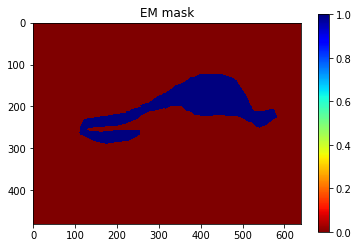

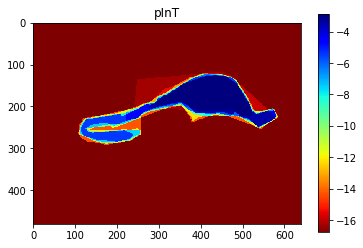

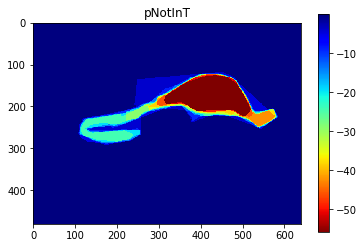

In [145]:
plot_GT_run_mask(8,10,5,-2)

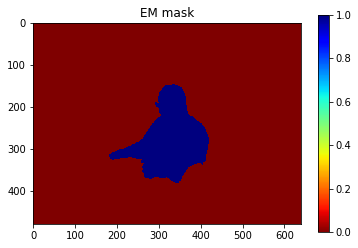

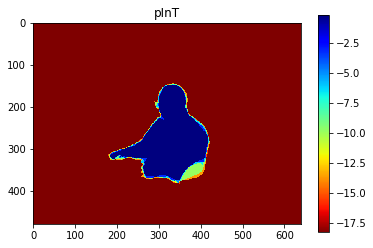

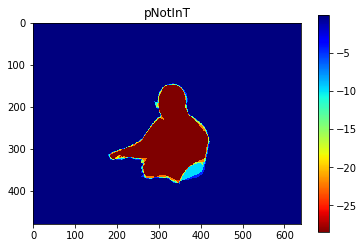

In [138]:
plot_GT_run_mask(1,5,0,0)

In [161]:
mode="Ground truth run"
test_sample_obj = [('10workers_rand5',8),('5workers_rand0',1)]
tbl = []
for test_sample in tqdm(test_sample_obj):
    sample_name= test_sample[0]
    objid = test_sample[1]
    outdir = '{}{}/obj{}/'.format(PIXEL_EM_DIR, sample_name, objid)
    for thresh in [-4,-2,0,2,4]:
        #for it in range(5):
        it =4
        gt_est_mask = pkl.load(open(outdir+"gt_est_ground_truth_mask_thresh{}.pkl".format(thresh)))
        # Compute PR mask based on the EM estimate mask from every iteration
        [p, r, j] = get_precision_recall_jaccard(gt_est_mask, get_gt_mask(objid))
        tbl.append([sample_name,objid,thresh,p,r,j])
df = pd.DataFrame(tbl,columns=["sample_name",'objid','thresh','P [{}]'.format(mode),'R [{}]'.format(mode),'J [{}]'.format(mode)])

In [157]:
mode="MV"
test_sample_obj = [('10workers_rand5',8),('5workers_rand0',1)]
tbl = []
for test_sample in tqdm(test_sample_obj):
    sample_name= test_sample[0]
    objid = test_sample[1]
    outdir = '{}{}/obj{}/'.format(PIXEL_EM_DIR, sample_name, objid)
    
    gt_est_mask = pkl.load(open(outdir+"MV_mask.pkl"))
    # Compute PR mask based on the EM estimate mask from every iteration
    [p, r, j] = get_precision_recall_jaccard(gt_est_mask, get_gt_mask(objid))
    tbl.append([sample_name,objid,p,r,j])
MV = pd.DataFrame(tbl,columns=["sample_name",'objid','P [{}]'.format(mode),'R [{}]'.format(mode),'J [{}]'.format(mode)])

In [162]:
df.merge(MV)

,sample_name,objid,thresh,P [Ground truth run],R [Ground truth run],J [Ground truth run],P [MV],R [MV],J [MV]
0,10workers_rand5,8,-4,0.882290,0.965110,0.855019,0.973227,0.687816,0.675043
1,10workers_rand5,8,-2,0.920740,0.952794,0.880570,0.973227,0.687816,0.675043
2,10workers_rand5,8,0,0.920567,0.949180,0.877325,0.973227,0.687816,0.675043
3,10workers_rand5,8,2,0.923573,0.939972,0.872134,0.973227,0.687816,0.675043
4,10workers_rand5,8,4,0.930324,0.936903,0.875472,0.973227,0.687816,0.675043
5,5workers_rand0,1,-4,0.925597,0.990605,0.917542,0.977603,0.980179,0.958651
6,5workers_rand0,1,-2,0.925597,0.990605,0.917542,0.977603,0.980179,0.958651
7,5workers_rand0,1,0,0.969400,0.986060,0.956295,0.977603,0.980179,0.958651
8,5workers_rand0,1,2,0.977603,0.980179,0.958651,0.977603,0.980179,0.958651
9,5workers_rand0,1,4,0.977603,0.980179,0.958651,0.977603,0.980179,0.958651


# Qj=0.6 initialization for isoGT 

In [198]:
ls pixel_em/10workers_rand5/obj8/isoQjinitGT_p_not_in_mask_0_thresh0.pkl

pixel_em/10workers_rand5/obj8/isoQjinitGT_p_not_in_mask_0_thresh0.pkl


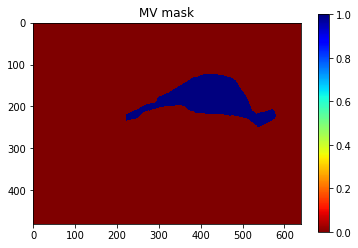

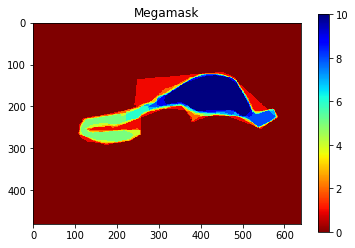

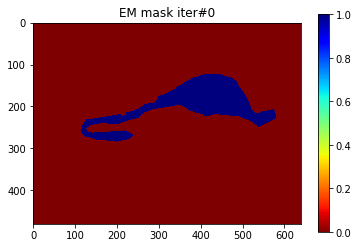

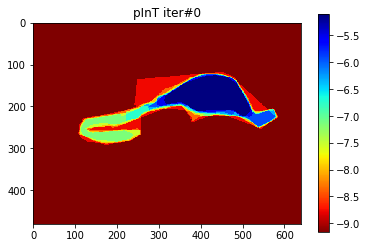

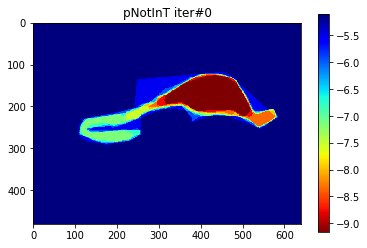

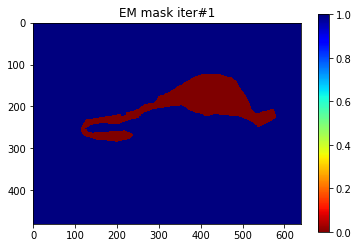

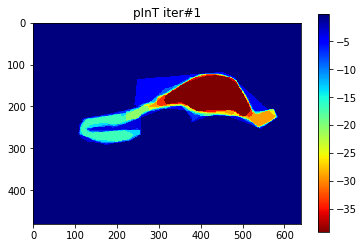

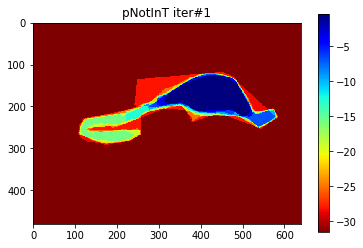

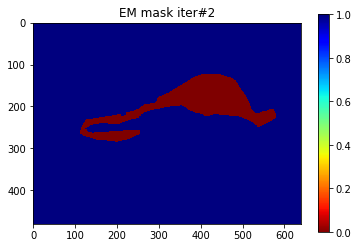

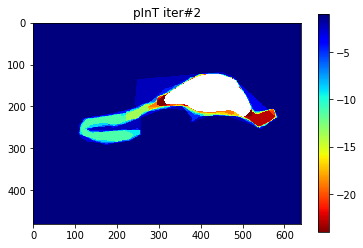

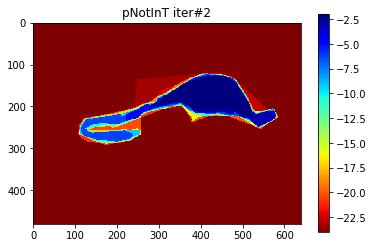

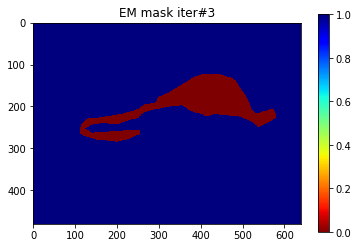

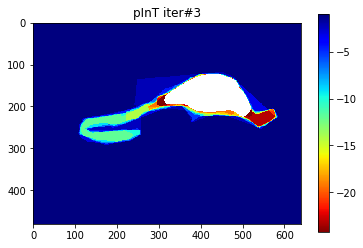

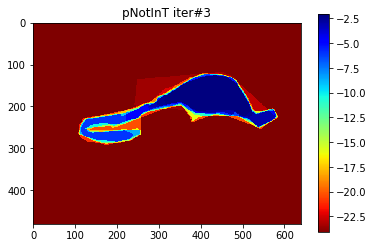

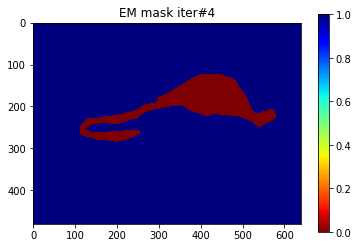

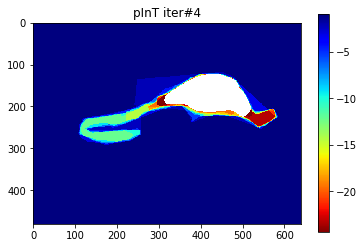

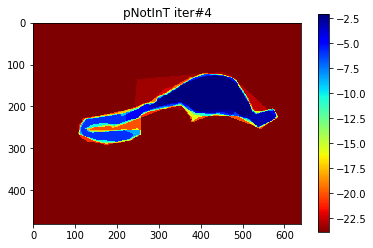

In [201]:
for iteration in range(5):
    plot_MV_EM_mask(8,10,5,'isoQjinitGT_',0,iteration)

In [205]:
mode="isoQjinitGT_"
test_sample_obj = [('10workers_rand5',8),('5workers_rand0',1)]
tbl = []
for test_sample in tqdm(test_sample_obj):
    sample_name= test_sample[0]
    objid = test_sample[1]
    outdir = '{}{}/obj{}/'.format(PIXEL_EM_DIR, sample_name, objid)
    for thresh in [-4,-2,0,2,4]:
        #for it in range(5):
        it =4
        gt_est_mask = pkl.load(open(outdir+"{}gt_est_mask_{}_thresh{}.pkl".format(mode,it,thresh)))
        # Compute PR mask based on the EM estimate mask from every iteration
        [p, r, j] = get_precision_recall_jaccard(gt_est_mask, get_gt_mask(objid))
        tbl.append([sample_name,objid,thresh,p,r,j])
df = pd.DataFrame(tbl,columns=["sample_name",'objid','thresh','P [{}]'.format(mode),'R [{}]'.format(mode),'J [{}]'.format(mode)])

In [207]:
df.merge(MV)

,sample_name,objid,thresh,P [isoQjinitGT_],R [isoQjinitGT_],J [isoQjinitGT_],P [MV],R [MV],J [MV]
0,10workers_rand5,8,-4,0.045479,0.522224,0.043662,0.973227,0.687816,0.675043
1,10workers_rand5,8,-2,0.032433,0.366889,0.030714,0.973227,0.687816,0.675043
2,10workers_rand5,8,0,0.011927,0.131751,0.011058,0.973227,0.687816,0.675043
3,10workers_rand5,8,2,0.008028,0.088235,0.007413,0.973227,0.687816,0.675043
4,10workers_rand5,8,4,0.000456,0.004779,0.000416,0.973227,0.687816,0.675043
5,5workers_rand0,1,-4,0.085234,1.000000,0.085234,0.977603,0.980179,0.958651
6,5workers_rand0,1,-2,0.007340,0.079323,0.006764,0.977603,0.980179,0.958651
7,5workers_rand0,1,0,0.001847,0.019821,0.001693,0.977603,0.980179,0.958651
8,5workers_rand0,1,2,0.000266,0.002826,0.000243,0.977603,0.980179,0.958651
9,5workers_rand0,1,4,0.000266,0.002826,0.000243,0.977603,0.980179,0.958651


In [235]:
qp = pkl.load(open("pixel_em/10workers_rand5/obj8/isoQjinitGT_qp_4_thresh0.pkl"))
qn = pkl.load(open("pixel_em/10workers_rand5/obj8/isoQjinitGT_qn_4_thresh0.pkl"))
worker_tbl = compare_qn_qp_w_GTJaccard(8,qn,qp)

 worker_id  Jaccard [Self]        qn        qp
        54        0.861646  0.257661  0.017252
       148        0.811349  0.343223  0.007297
       156        0.656011  0.015684  0.063955
       161        0.641127  0.066477  0.114176
       193        0.846011  0.350873  0.243170
       169        0.828900  0.432354  0.000000
       208        0.776597  0.020785  0.206534
       234        0.498127  0.013219  0.050932
       235        0.521902  0.047392  0.111930
       260        0.600180  0.229013  0.095502


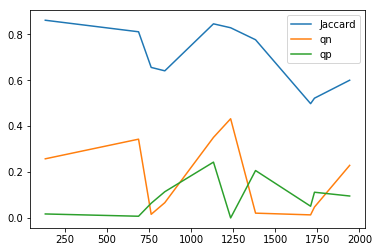

In [220]:
plt.plot(worker_tbl["Jaccard [Self]"],label='Jaccard')
plt.plot(worker_tbl["qn"],label='qn')
plt.plot(worker_tbl["qp"],label='qp')
plt.legend()

# Worker Jaccard 

In [190]:
worker_score = pd.read_csv('../computed_my_COCO_BBvals.csv',index_col=0)

In [252]:
def compare_qn_qp_w_GTJaccard(objid,qn,qp):
    worker_tbl = worker_score[(worker_score["object_id"]==objid )&(worker_score["worker_id"].isin(qn.keys()))][["worker_id","Precision [Self]","Recall [Self]","Jaccard [Self]"]]
    worker_tbl["qn"]=qn.values()
    worker_tbl["qp"]=qp.values()
    print worker_tbl.to_string(index=False)#,formatters= lambda x: "{:.2f}".format(x))
    return worker_tbl

# Compare GTLSA to GT / basic / MV 

In [ ]:
def plot_MV_EM_mask(object_id,Nworker,batch_num,mode,thresh,iteration):

In [ ]:
ls pixel_em/10workers_rand5/obj8/GTLSA_g

IOError: [Errno 2] No such file or directory: 'pixel_em/10workers_rand5/obj8/GTLSA_gt_est_mask_0_thresh-4.pkl'

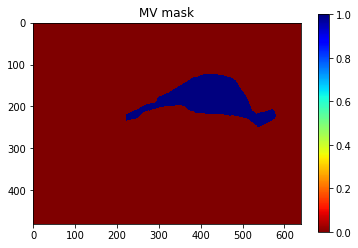

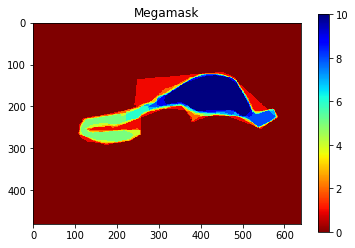

In [278]:
for iteration in range(5):
    plot_MV_EM_mask(8,10,5,'GTLSA_',-4,iteration)

### Fixed GT bug 

------------------------------------------------------------------------